In [59]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# 4.1

In [60]:
df = pd.read_csv("M&M.csv")

In [61]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

### Creating DF with Bollinger Bands

In [62]:
df_1 = df.copy()
avg_14 = df_1.filter(['Close Price']).rolling(14).mean()
std_14 = df_1.filter(['Close Price']).rolling(14).std()
avg_14.rename(columns = {'Close Price':'14 SMA'}, inplace = True)
std_14.rename(columns = {'Close Price':'14 SMA'}, inplace = True)
df_1['UBB'] = avg_14 + 2*std_14
df_1['LBB'] = avg_14 - 2*std_14
df_1['AvgBB'] = (df_1['UBB']+df_1['LBB'])/2
df_1 = df_1.dropna()
df_1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UBB,LBB,AvgBB
Date,,,,,,,,,,,,,,,,,
2017-06-01,M&amp;M,EQ,1416.95,1430.00,1441.00,1416.10,1426.65,1425.25,1429.30,1712339,2.447443e+09,55540,1120694,65.45,1427.208638,1284.991362,1356.100000
2017-06-02,M&amp;M,EQ,1425.25,1430.00,1434.75,1409.00,1421.95,1418.50,1425.52,1442389,2.056158e+09,57116,1022592,70.90,1437.241207,1281.080222,1359.160714
2017-06-05,M&amp;M,EQ,1418.50,1424.95,1432.50,1421.10,1423.00,1423.70,1427.16,1151951,1.644021e+09,49138,966825,83.93,1448.638701,1277.875584,1363.257143
2017-06-06,M&amp;M,EQ,1423.70,1423.05,1429.85,1404.15,1409.00,1411.45,1410.94,803816,1.134133e+09,24783,595729,74.11,1454.509926,1276.668645,1365.589286
2017-06-07,M&amp;M,EQ,1411.45,1423.15,1451.10,1413.55,1430.00,1431.90,1438.06,1904689,2.739057e+09,74038,1150446,60.40,1466.485721,1275.985708,1371.235714


### Creating 'Call' Column

In [63]:
df_2 = df_1.copy()
for index, row in df_2.iterrows():
    if row['Average Price'] < row['LBB']:
        df_2.loc[index, 'Call'] = 'Buy'
    elif row['Average Price'] < row['AvgBB'] and row['Average Price'] > row['LBB']:
        df_2.loc[index, 'Call'] = 'Hold Buy/Liquidate Short'
    elif row['Average Price'] > row['AvgBB'] and row['Average Price'] < row['UBB']:
        df_2.loc[index, 'Call'] = 'Hold Short/Liquidate Buy'
    elif row['Average Price'] > row['UBB']:
        df_2.loc[index, 'Call'] = 'Short'

In [64]:
df_2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UBB,LBB,AvgBB,Call
Date,,,,,,,,,,,,,,,,,,
2017-06-01,M&amp;M,EQ,1416.95,1430.00,1441.00,1416.10,1426.65,1425.25,1429.30,1712339,2.447443e+09,55540,1120694,65.45,1427.208638,1284.991362,1356.100000,Short
2017-06-02,M&amp;M,EQ,1425.25,1430.00,1434.75,1409.00,1421.95,1418.50,1425.52,1442389,2.056158e+09,57116,1022592,70.90,1437.241207,1281.080222,1359.160714,Hold Short/Liquidate Buy
2017-06-05,M&amp;M,EQ,1418.50,1424.95,1432.50,1421.10,1423.00,1423.70,1427.16,1151951,1.644021e+09,49138,966825,83.93,1448.638701,1277.875584,1363.257143,Hold Short/Liquidate Buy
2017-06-06,M&amp;M,EQ,1423.70,1423.05,1429.85,1404.15,1409.00,1411.45,1410.94,803816,1.134133e+09,24783,595729,74.11,1454.509926,1276.668645,1365.589286,Hold Short/Liquidate Buy
2017-06-07,M&amp;M,EQ,1411.45,1423.15,1451.10,1413.55,1430.00,1431.90,1438.06,1904689,2.739057e+09,74038,1150446,60.40,1466.485721,1275.985708,1371.235714,Hold Short/Liquidate Buy


In [65]:
df_2.isna().sum() #print number of null values in dataframe

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
UBB                       0
LBB                       0
AvgBB                     0
Call                      0
dtype: int64

### Test - Train Split

In [66]:
replace_vals = {'Buy': 0,'Hold Buy/Liquidate Short': 1,'Hold Short/Liquidate Buy': 2,'Short': 3}
df_3 = df_2.replace(to_replace=replace_vals)

In [67]:
features = df_2.filter(['Close Price', 'UBB', 'LBB', 'AvgBB'])
label = df_3.filter(['Call'])
label_names = df_2.filter(['Call'])

In [68]:
X = features.values
y = label.values.squeeze()

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2)

### Using LDA Classifier

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create model
clf = LinearDiscriminantAnalysis()
clf_lda = clf.fit(X_train, y_train)

# Predicting the test set result
y_pred = clf_lda.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {asc(y_pred, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.863013698630137

Confusion Matrix:
[[ 1  4  0  0]
 [ 0 64  5  1]
 [ 0  8 61  0]
 [ 0  0  2  0]]


### Using QDA Classifier

In [71]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create model
clf = QuadraticDiscriminantAnalysis()
clf_qda = clf.fit(X_train, y_train)

# Predicting the test set result
y_pred = clf_qda.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {asc(y_pred, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.8082191780821918

Confusion Matrix:
[[ 0  5  0  0]
 [ 0 56 13  1]
 [ 0  1 60  8]
 [ 0  0  0  2]]


C:\Users\VR94\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Using SVM Classifier

In [72]:
from sklearn.svm import SVC

# Create model
clf = SVC(kernel = 'rbf') #kernal can be sigmoid, polynomial and gaussian
# classifier = SVC(kernel = 'rbf') # for gaussian
# classifier = SVC(kernel = 'sigmoid') # for sigmoid [ONLY FOR 2 OUTPUTS]
# classifier = SVC(kernel = 'poly', degree = 8) # for polynomial, specify degree [SHOWS ERROR]
clf_svm = clf.fit(X_train, y_train)

# Predicting the test set result
y_pred = clf_svm.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {asc(y_pred, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.6232876712328768

Confusion Matrix:
[[ 0  2  3  0]
 [ 0 32 38  0]
 [ 0 10 59  0]
 [ 0  0  2  0]]


### Using Decesion Tree

For decesion tree, we need to find the optimum value for depth of tree or no of sample split to get the best model. For this a a search for optimum values has to be done as shown below.

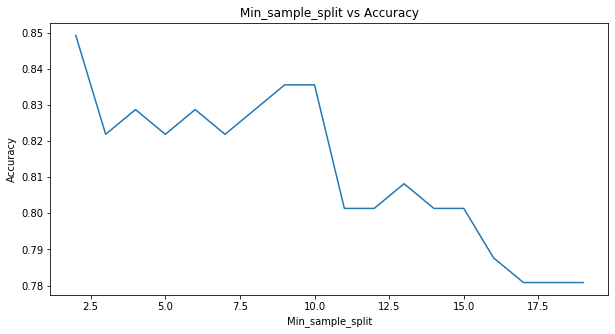

No. of splits:
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Corresponding Accuracy:
[0.8493150684931506, 0.821917808219178, 0.8287671232876712, 0.821917808219178, 0.8287671232876712, 0.821917808219178, 0.8287671232876712, 0.8356164383561644, 0.8356164383561644, 0.8013698630136986, 0.8013698630136986, 0.8082191780821918, 0.8013698630136986, 0.8013698630136986, 0.7876712328767124, 0.7808219178082192, 0.7808219178082192, 0.7808219178082192]


In [73]:
from sklearn.tree import DecisionTreeClassifier

# Create model by changing the min_sample_split
acu1 = []
splits =[]
for i in range(2,20):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="gini", min_samples_split=i, random_state =1)

    # Train Decision Tree Classifer
    clf_dt1 = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt1.predict(X_test)
    splits.append(i)
    acu1.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize = (10,5))
plt.plot(splits,acu1)
plt.xlabel("Min_sample_split")
plt.ylabel("Accuracy")
plt.title("Min_sample_split vs Accuracy")
plt.show()
print(f"No. of splits:\n{splits}\n")
print(f"Corresponding Accuracy:\n{acu1}")

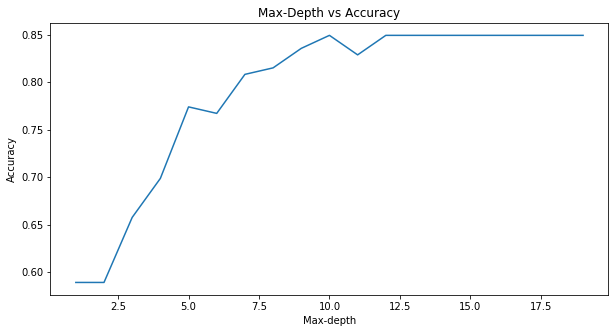

Depth of tree:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Corresponding Accuracy:
[0.589041095890411, 0.589041095890411, 0.6575342465753424, 0.6986301369863014, 0.773972602739726, 0.7671232876712328, 0.8082191780821918, 0.815068493150685, 0.8356164383561644, 0.8493150684931506, 0.8287671232876712, 0.8493150684931506, 0.8493150684931506, 0.8493150684931506, 0.8493150684931506, 0.8493150684931506, 0.8493150684931506, 0.8493150684931506, 0.8493150684931506]


In [74]:
#By changing the max_depth
acu2 = []
dep =[]
for i in range(1,20):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state =1)

    # Train Decision Tree Classifer
    clf_dt2 = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt2.predict(X_test)
    dep.append(i)
    acu2.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize = (10,5))
plt.plot(dep,acu2)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy")
plt.show()
print(f"Depth of tree:\n{dep}\n")
print(f"Corresponding Accuracy:\n{acu2}")

The variation of accuracy with respect to depth of tree and min sample split is shown above. The max accuracy value from both the cases are compared and the corresponding parameters are choosen.

In [75]:
if max(acu2)>max(acu1):
    i = acu2.index(max(acu2))
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth = dep[i], random_state =1)
    clf_dt = clf.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)
else:
    i = acu1.index(max(acu1))
    clf_dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = splits[i], random_state =1)
    clf_dt = clf.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)

#Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
#Printing accuracy
print(f"Accuracy: {asc(y_pred_dt, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.8493150684931506

Confusion Matrix:
[[ 0  5  0  0]
 [ 1 66  3  0]
 [ 0 10 58  1]
 [ 0  0  2  0]]


From the various classifier shown above, LDA classifier was seen to give the best accuracy overall. So we will be choosing that for further analysis.

### Importing new Stock Data and predicting  calls with above model

In [76]:
df_maruti = pd.read_csv("MARUTI.csv")

In [77]:
df_maruti['Date'] = pd.to_datetime(df_maruti['Date'])
df_maruti = df_maruti.set_index('Date')

#### 1. Create Bolinger Bollinger Bands for Maruti Stock

In [78]:
df_1_maruti = df_maruti.copy()
avg_14 = df_1_maruti.filter(['Close Price']).rolling(14).mean()
std_14 = df_1_maruti.filter(['Close Price']).rolling(14).std()
avg_14.rename(columns = {'Close Price':'14 SMA'}, inplace = True)
std_14.rename(columns = {'Close Price':'14 SMA'}, inplace = True)
df_1_maruti['UBB'] = avg_14 + 2*std_14
df_1_maruti['LBB'] = avg_14 - 2*std_14
df_1_maruti['AvgBB'] = (df_1_maruti['UBB']+df_1_maruti['LBB'])/2
df_1_maruti = df_1_maruti.dropna()
df_1_maruti.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UBB,LBB,AvgBB
Date,,,,,,,,,,,,,,,,,
2017-06-01,MARUTI,EQ,7211.0,7242.0,7245.0,7110.10,7150.00,7146.6,7165.03,649217,4.651661e+09,74481,276770,42.63,7278.012455,6650.258974,6964.135714
2017-06-02,MARUTI,EQ,7146.6,7182.0,7187.7,7100.00,7110.60,7114.7,7135.00,310268,2.213762e+09,33719,153510,49.48,7297.291863,6672.522422,6984.907143
2017-06-05,MARUTI,EQ,7114.7,7139.8,7161.9,7091.10,7116.05,7125.7,7126.86,296147,2.110599e+09,31551,137016,46.27,7317.706277,6676.643723,6997.175000
2017-06-06,MARUTI,EQ,7125.7,7134.0,7154.3,7085.05,7118.95,7112.1,7110.16,324579,2.307810e+09,45217,197591,60.88,7333.461986,6682.873728,7008.167857
2017-06-07,MARUTI,EQ,7112.1,7135.0,7225.0,7107.60,7198.00,7205.7,7189.75,518152,3.725381e+09,44672,192737,37.20,7359.096234,6710.760909,7034.928571


#### 2. Extract Features

In [79]:
features_maruti = df_1_maruti.filter(['Close Price', 'UBB', 'LBB', 'AvgBB'])

In [80]:
X_maruti = features_maruti.values

#### 3. Predicting with LDA model

In [81]:
# Predicting the set result
y_pred_maruti = clf_lda.predict(X_maruti)

#### 4. Display Predictied 'Call' Results

In [82]:
pred_maruti = features_maruti.copy()
pred_maruti['Calls'] = y_pred_maruti

In [83]:
inv_map = {v: k for k, v in replace_vals.items()} #reversing the 'replace_value' dictionary
inv_map

{0: 'Buy',
 1: 'Hold Buy/Liquidate Short',
 2: 'Hold Short/Liquidate Buy',
 3: 'Short'}

In [84]:
pred_maruti = pred_maruti.replace(to_replace=inv_map)
pred_maruti.tail()

,Close Price,UBB,LBB,AvgBB,Calls
Date,,,,,
2019-05-07,6702.00,7636.878670,6392.778472,7014.828571,Short
2019-05-08,6650.15,7585.199648,6345.500352,6965.350000,Short
2019-05-09,6624.95,7515.141609,6311.622677,6913.382143,Short
2019-05-10,6631.60,7383.528216,6325.100356,6854.314286,Short
2019-05-13,6543.75,7218.187284,6361.341288,6789.764286,Buy


# 4.2

We are using the same Mahindra and Mahindra (M&M) stock price data. For this analyis.

In [85]:
df = pd.read_csv("M&M.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [86]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,M&amp;M,EQ,2017-05-15,1367.85,1373.0,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
1,M&amp;M,EQ,2017-05-16,1375.65,1377.0,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
2,M&amp;M,EQ,2017-05-17,1366.35,1363.0,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
3,M&amp;M,EQ,2017-05-18,1378.80,1369.0,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
4,M&amp;M,EQ,2017-05-19,1352.85,1350.0,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20


### Calculate percentage change in price and 5 day rolling mean, std

In [87]:
df_1 = df.copy()
df_1['perc_change_open-close'] = 100*(df_1['Close Price'] - df_1['Open Price'])/df_1['Open Price']
df_1['perc_change_high-low'] = 100*(df_1['High Price'] - df_1['Low Price'])/df_1['Low Price']

In [88]:
df_1['5 day roll_mean'] = df_1['perc_change_open-close'].rolling(5).mean()
df_1['5 day roll_std'] = df_1['perc_change_open-close'].rolling(5).std()

In [89]:
df_2 = df_1.dropna()
df_2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,perc_change_open-close,perc_change_high-low,5 day roll_mean,5 day roll_std
4,M&amp;M,EQ,2017-05-19,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,-1.229630,2.190440,-0.366106,1.026242
5,M&amp;M,EQ,2017-05-22,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,-2.529568,3.139651,-0.910621,1.332119
6,M&amp;M,EQ,2017-05-23,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17,1.273764,2.950000,-0.501184,1.659269
7,M&amp;M,EQ,2017-05-24,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10,-1.716110,2.869876,-1.076247,1.421121
8,M&amp;M,EQ,2017-05-25,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23,1.258581,2.446319,-0.588592,1.755707


### Create Action column

In [90]:
for index, row in df_2.iterrows():
    if index+1 in df_2.index:
        if df_2.loc[index+1, 'Close Price'] > row['Close Price']:
            df_2.loc[index, 'Action'] = 1
        if df_2.loc[index+1, 'Close Price'] < row['Close Price']:
            df_2.loc[index, 'Action'] = -1

C:\Users\VR94\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\VR94\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [91]:
df_2 = df_2.dropna()
df_2.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,perc_change_open-close,perc_change_high-low,5 day roll_mean,5 day roll_std,Action
491,M&amp;M,EQ,2019-05-06,645.80,640.00,645.00,635.1,638.00,638.50,639.27,1498420,9.578940e+08,48879,840152,56.07,-0.234375,1.558810,-0.677800,0.960048,-1.0
492,M&amp;M,EQ,2019-05-07,638.50,641.75,642.90,634.2,635.55,636.00,637.64,3160875,2.015496e+09,72445,2366596,74.87,-0.895988,1.371807,-0.642477,0.945022,-1.0
493,M&amp;M,EQ,2019-05-08,636.00,635.55,637.00,619.0,624.60,621.65,631.73,3853705,2.434492e+09,51461,3092701,80.25,-2.187082,2.907916,-0.643331,0.946763,1.0
494,M&amp;M,EQ,2019-05-09,621.65,620.90,627.95,616.1,625.80,625.45,621.74,1366143,8.493796e+08,52412,538598,39.42,0.732807,1.923389,-0.493673,1.115012,1.0
495,M&amp;M,EQ,2019-05-10,625.45,626.25,631.85,619.0,625.85,628.75,624.59,2093110,1.307326e+09,55778,1074491,51.33,0.399202,2.075929,-0.437087,1.159978,-1.0


### Test - Train split

In [92]:
features = df_2.filter(['perc_change_open-close', 'perc_change_high-low', '5 day roll_mean', '5 day roll_std'])
label = df_2.filter(['Action'])

In [93]:
X = features.values
y = label.values.squeeze()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2)

### Random Forrest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    random_state=1,
    max_samples=None,
)

clf_rf = rf.fit(X_train, y_train)

In [96]:
# Predicting the test set result
y_pred = clf_rf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {asc(y_test, y_pred)}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.5510204081632653

Confusion Matrix:
[[40 34]
 [32 41]]


### Calculating Percentage Returns

In [97]:
y_pred_all = clf_rf.predict(X) # predict for whole feature set

In [106]:
df_3 = df_2.copy()

In [107]:
df_3['Action_Pred'] = y_pred_all

In [108]:
for index, row in df_3.iterrows():
    if index+1 in df_3.index:
        if row['Action_Pred'] == 1:
            df_3.loc[index, 'Returns_perc'] = (df_3.loc[index+1, 'Close Price'] - row['Close Price']) / row['Close Price']
        if row['Action_Pred'] == -1:
            df_3.loc[index, 'Returns_perc'] = -(df_3.loc[index+1, 'Close Price'] - row['Close Price']) / row['Close Price']

In [109]:
df_3 = df_3.dropna()

### Calculating Cumulative Returns

In [110]:
cumul_return = 0
for index, row in df_3.iterrows():
    cumul_return += row['Returns_perc']
    df_3.loc[index, 'Cumulative_returns'] = cumul_return

In [111]:
df_3.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,perc_change_open-close,perc_change_high-low,5 day roll_mean,5 day roll_std,Action,Action_Pred,Returns_perc,Cumulative_returns
490,M&amp;M,EQ,2019-05-03,645.90,645.05,652.50,642.85,645.00,645.80,645.86,...,1474170,63.25,0.116270,1.501128,-0.828901,0.931850,-1.0,-1.0,0.011304,4.443031
491,M&amp;M,EQ,2019-05-06,645.80,640.00,645.00,635.10,638.00,638.50,639.27,...,840152,56.07,-0.234375,1.558810,-0.677800,0.960048,-1.0,-1.0,0.003915,4.446946
492,M&amp;M,EQ,2019-05-07,638.50,641.75,642.90,634.20,635.55,636.00,637.64,...,2366596,74.87,-0.895988,1.371807,-0.642477,0.945022,-1.0,-1.0,0.022563,4.469509
493,M&amp;M,EQ,2019-05-08,636.00,635.55,637.00,619.00,624.60,621.65,631.73,...,3092701,80.25,-2.187082,2.907916,-0.643331,0.946763,1.0,-1.0,-0.006113,4.463396
494,M&amp;M,EQ,2019-05-09,621.65,620.90,627.95,616.10,625.80,625.45,621.74,...,538598,39.42,0.732807,1.923389,-0.493673,1.115012,1.0,-1.0,-0.005276,4.458120


In [112]:
df_4 = df_3.filter(['Cumulative_returns'])

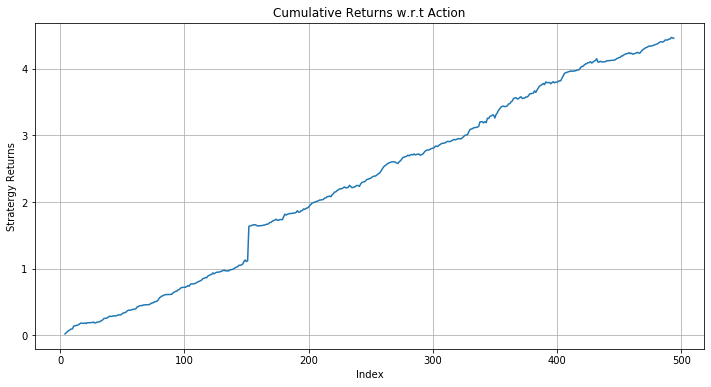

In [122]:
plt.figure(figsize=(12,6))
plt.plot(df_4)
plt.grid()
plt.title("Cumulative Returns w.r.t Action")
plt.ylabel("Stratergy Returns")
plt.xlabel("Index")
plt.show()